<a href="https://colab.research.google.com/github/xoxoreyniel/DSC1105/blob/main/DSC1105_FA2_Awit%2C_JT%3B_Deloyola%2C_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
library(tidyverse)
library(ggplot2)

cytof_data <- read.csv("cytof_one_experiment.csv")
dim(cytof_data)

[1] 50000    35

1 and 2. Use pivot_longer to reshape the dataset into one that has two columns, the first giving the protein identity and the second giving the amount of the protein in one of the cells. The dataset you get should have 1750000 rows (50000 cells in the original dataset times 35 proteins). Use group_by and summarise to find the median protein level and the median absolute deviation of the protein level for each marker. (Use the R functions median and mad).

In [36]:
# 1. Pivot the dataset
cytofL <- cytof_data %>%
  pivot_longer(
    cols = everything(),
    names_to = "protein",
    values_to = "amount"
  )
nrow(cytofL)


# 2. Group by protein and find Median and MAD
cytofsum <- cytofL %>%
  group_by(protein) %>%
  summarize(
    median_level = median(amount, na.rm = TRUE),
    mad_level = mad(amount, na.rm = TRUE)
  )

head(cytofsum)

[1] 1750000

protein,median_level,mad_level
<chr>,<dbl>,<dbl>
CD107a,-0.1222997,0.6086976
CD16,5.1229802,0.8744054
CD161,0.7256933,1.6882296
CD2,3.9453789,1.6770427
CD4,-0.2036499,0.3953896
CD56,5.7107903,0.9981358


3. Make a plot with MAD on the x-axis and median on the y-axis. This is known as a spreadlocation (s-l) plot. What does it tell you about the relationship betwen the median and the MAD?

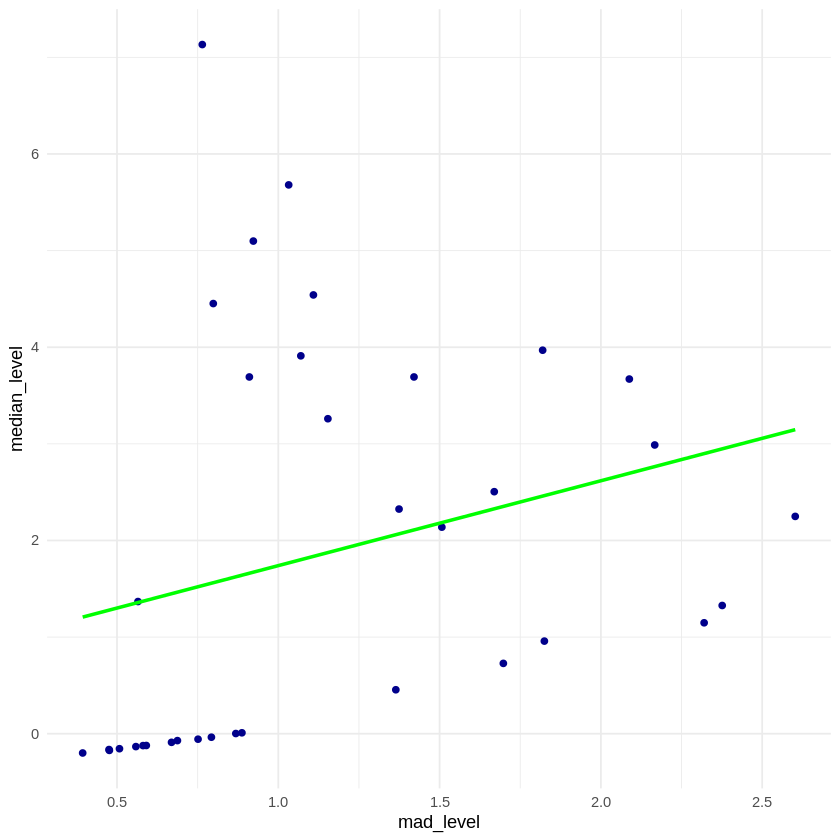

In [50]:
# 3. Create the Plot
ggplot(cytof_summary, aes(x = mad_level, y = median_level)) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "green") +
  theme_minimal()

The relationship between the median protein level and the MAD showed a pattern, visible in the s-l plot, indicating that as the average protein level increases, the variability increases proportionally.

For more practice pivoting,

In [48]:
library(dcldata)
library(tidyverse)

data(example_gymnastics_2)
gymL <- example_gymnastics_2 %>%
  pivot_longer(
    cols = -country,
    names_to = c("event", "year"),
    names_sep = "_",
    values_to = "score"
  )

head(gymL)
gymL

country,event,year,score
<chr>,<chr>,<chr>,<dbl>
United States,vault,2012,48.132
United States,floor,2012,45.366
United States,vault,2016,46.866
United States,floor,2016,45.999
Russia,vault,2012,46.366
Russia,floor,2012,41.599


country,event,year,score
<chr>,<chr>,<chr>,<dbl>
United States,vault,2012,48.132
United States,floor,2012,45.366
United States,vault,2016,46.866
United States,floor,2016,45.999
Russia,vault,2012,46.366
Russia,floor,2012,41.599
Russia,vault,2016,45.733
Russia,floor,2016,42.032
China,vault,2012,44.266
